In [1]:
import sys
sys.path.append('d:\\QUANT_GAME\\python_game\\factor\\factor_lab\\analyze_note')
from analyze_factor_note_init import AnalyzeFactorNotes as Note

---

### 初始化条件

In [2]:
factor_name = 'period_price_average'
start_date = 20100101
end_date = 20210101
med_tf = False
z_score_tf = False
demean_tf = False
sample_num = None
sample_every_date_tf = False

In [3]:
note = Note(factor_name, start_date, end_date,
                med_tf, z_score_tf, demean_tf,
                sample_num,sample_every_date_tf
            )

#### 加载数据

In [4]:
note.load_data()

---

#### 查看因子相关信息

##### - 因子定义及计算公式

因子名称： 时间窗口内价格平均因子(period_price_average)   
因子定义： 时间窗口$\delta t$内，收盘价的算数平均与收盘价的几何平均的比值   
时间窗口$\delta t$(默认20个交易日)内:
$$
NumMean = \frac{1}{N} \sum_{i=1}^N Price_i
$$
$$
GeoMean = \sqrt[N]{\prod_{i=1}^N Price_i}
$$
$$
factor = \frac{NumMean} {GeoMean}
$$

#### -因子信息

In [5]:
factor_info = note.get_factor_info()
for k,v in factor_info.items():
    print(k,':',v)

name : period_price_average
fields : ['close']
other_dIepend_factors : []
calc_params : {'delta_preiod': 20}
save_h5_path : F:\factor_lab_res\prepared_data\factor_data.h5
value_range : [1.0000001844852622, 2.9163801495344073]
process_suggest_method : None


---

### 因子分析

In [6]:
note.get_data_for_analysis()

In [7]:
zy_fa = note.analysis_factor()

#### 绘制factor-return散点图

- 全部数据

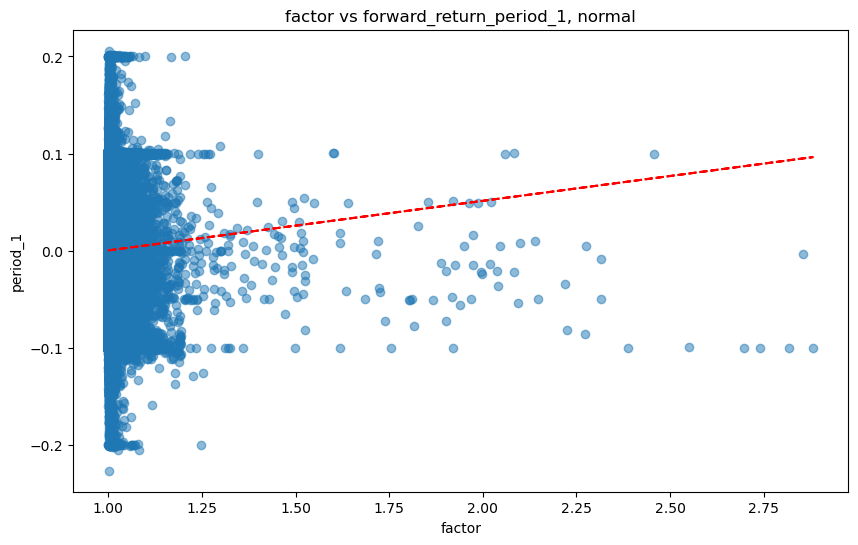

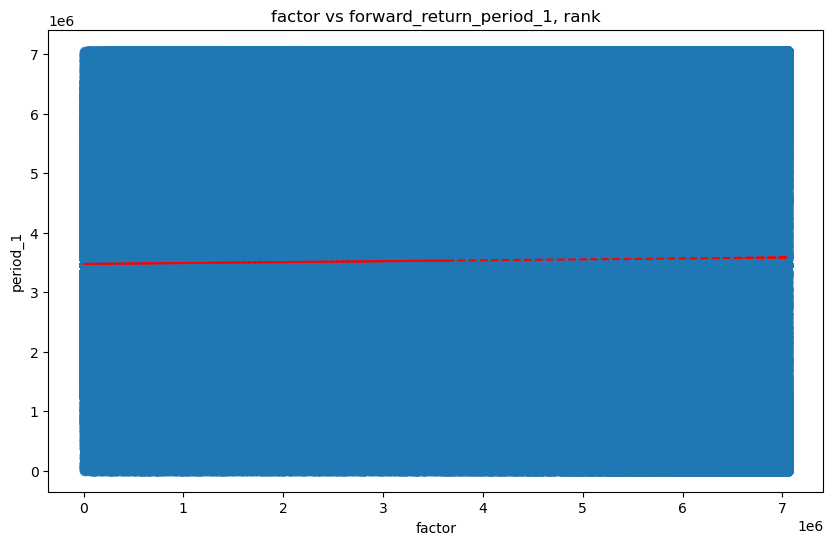

In [8]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=None)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=None)

- 抽样100000

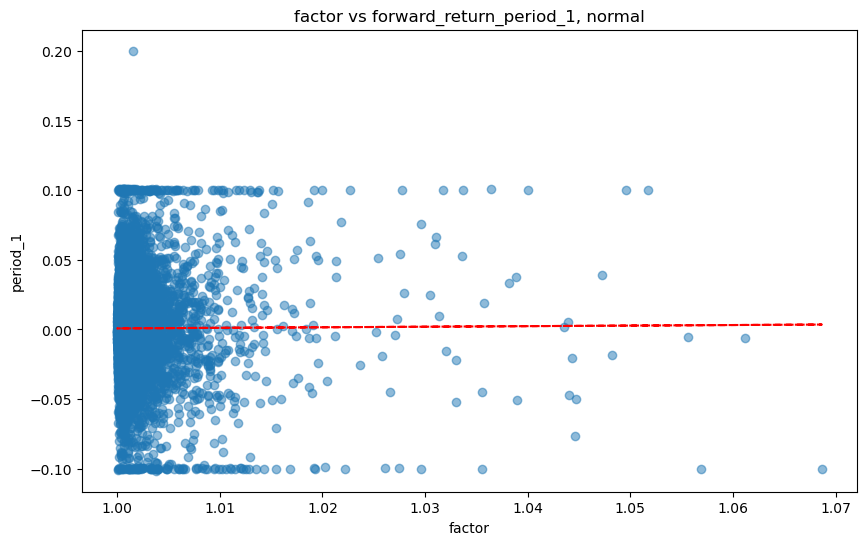

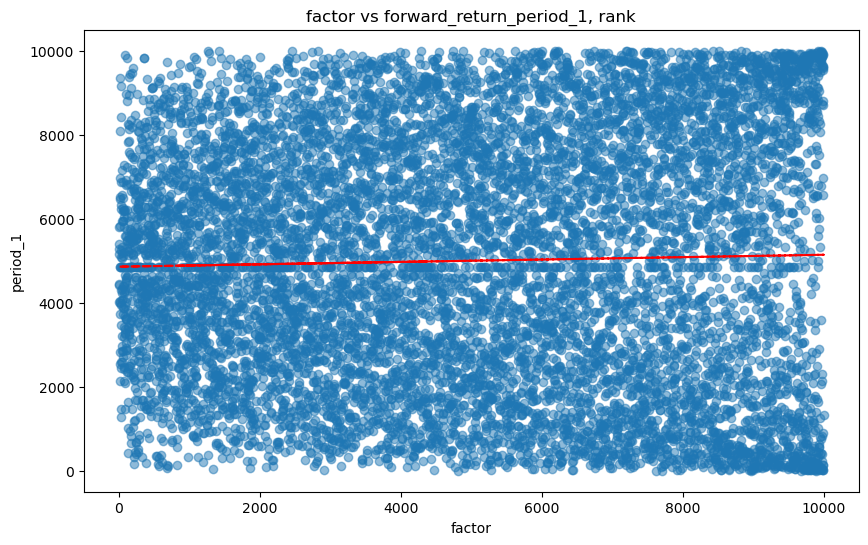

In [9]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=10000)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=10000)

### 绘制因子分布图

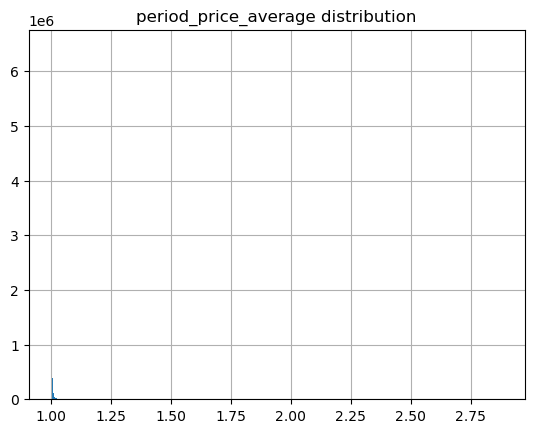

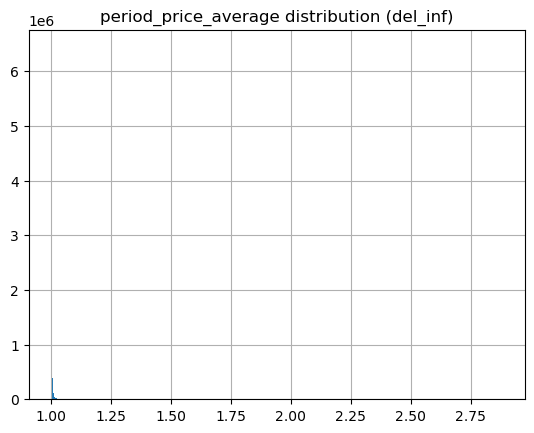

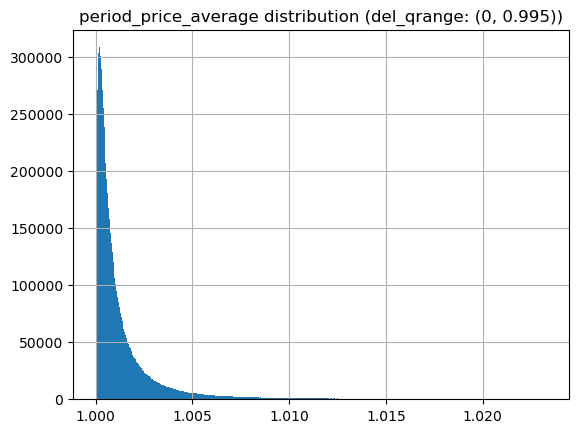

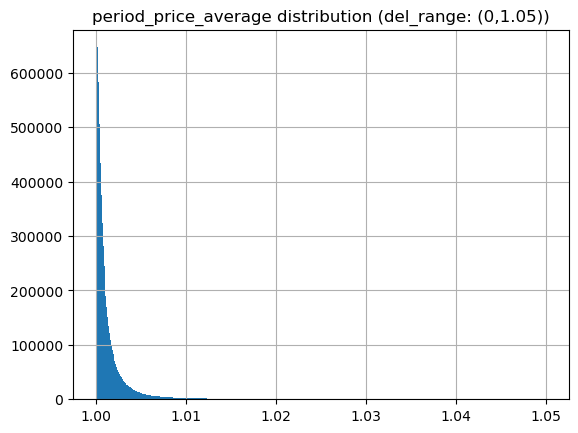

In [10]:
# 原始因子分布图
zy_fa.plot_factor_hist()
# 剔除inf后的因子分布图
zy_fa.plot_factor_hist(del_inf=True)
# 截取分位数qrange的因子分布图
zy_fa.plot_factor_hist(del_qrange=(0,0.995))
# 截取给定range的因子分布图
zy_fa.plot_factor_hist(del_range=(0,1.05))

---

#### IC

#### 打印因子ic分析结果

In [11]:
analyze_ic_res = zy_fa.analyze_ic_res()
print('analyze_ic_res:\n',analyze_ic_res)


analyze_ic_res:
                       period_1  period_2  period_3  period_5  period_8  \
norm_ic_mean         -0.000439 -0.004122 -0.006357 -0.008877 -0.011545   
norm_ic_std           0.104711  0.108178  0.108299  0.105831  0.103059   
norm_ic_0.02_percent  0.830591  0.844054  0.834705  0.832461  0.819372   
norm_ic_t                  NaN       NaN       NaN       NaN       NaN   
norm_ir              -0.004196 -0.038103 -0.058696 -0.083882  -0.11202   
norm_abs_ic           0.008783  0.013866  0.016764  0.019065  0.019426   
rank_ic_mean         -0.023294 -0.026798 -0.029073 -0.031362 -0.031931   
rank_ic_std           0.155299   0.15653   0.15645  0.154179  0.151891   
rank_ic_0.02_percent  0.897906  0.903141  0.906507  0.906507  0.904637   
rank_ic_t                  NaN       NaN       NaN       NaN       NaN   
rank_ir              -0.149992 -0.171201  -0.18583 -0.203416 -0.210224   
rank_abs_ic           0.015479   0.01343  0.017476  0.022206  0.029444   

                    

---

#### 绘制norm_ic的时序图

<Figure size 640x480 with 0 Axes>

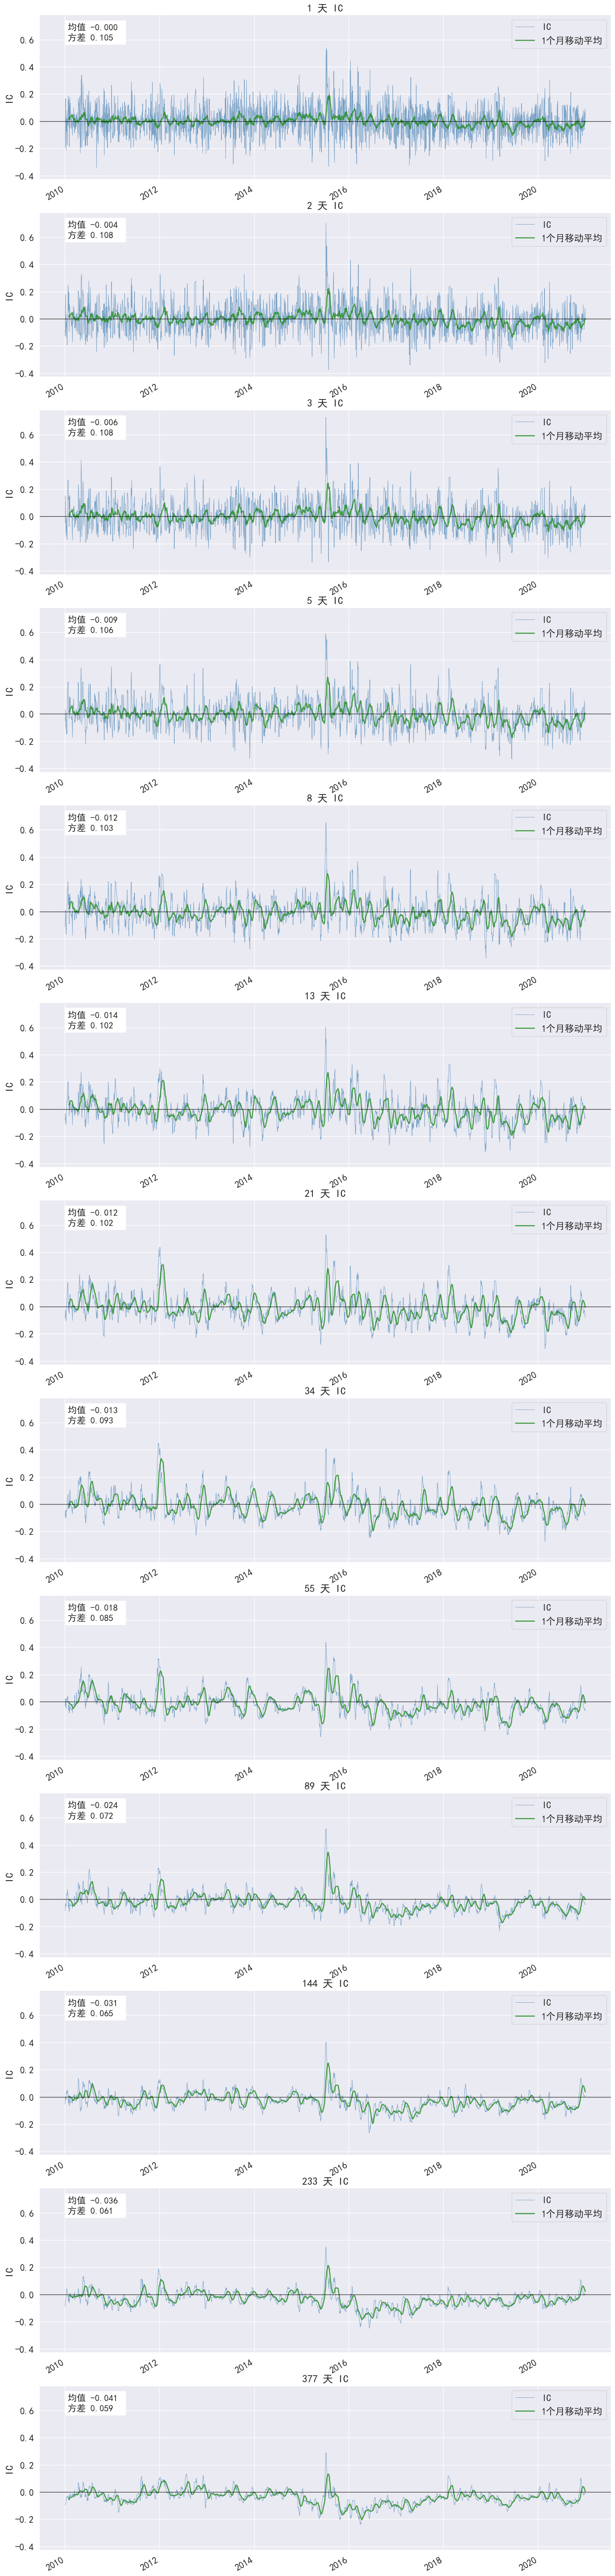

In [12]:
zy_fa.plot_norm_ic_ts()

---

#### 绘制rank_ic的时序图

<Figure size 640x480 with 0 Axes>

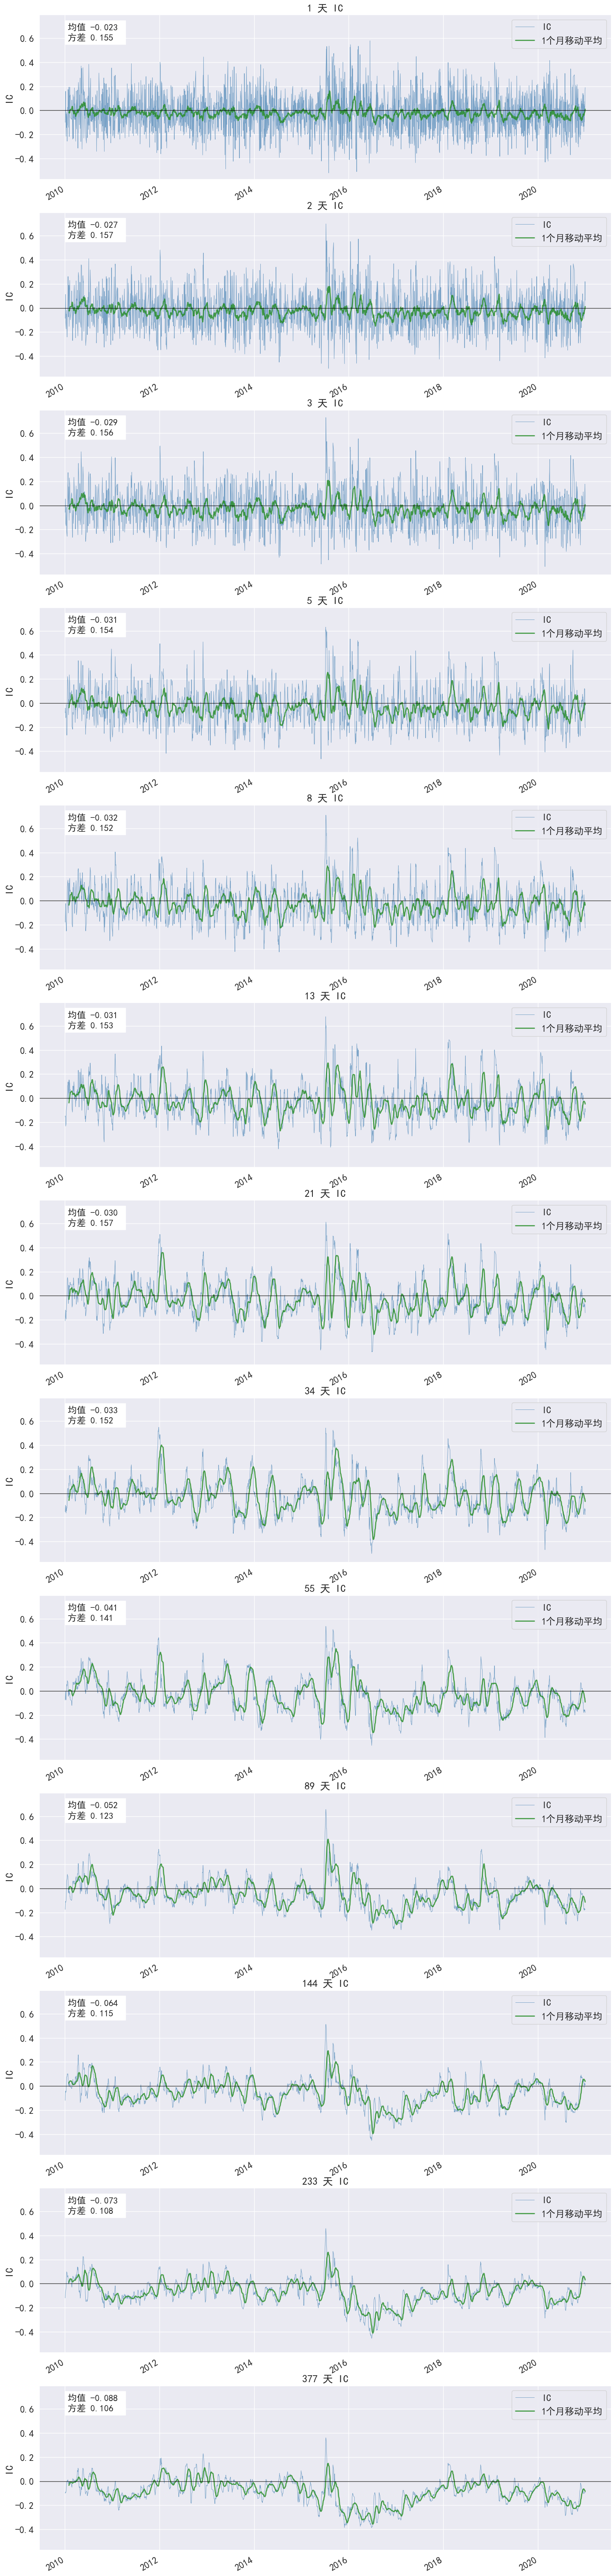

In [13]:
zy_fa.plot_rank_ic_ts()